<a href="https://colab.research.google.com/github/jmelendezgeo/Apuntes-Data-Science/blob/main/Extraccion%20de%20datos%20en%20la%20web/BeautifulSoup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modulo 2: HTML: Request y BeautifulSoup

## Parsing Pagina12

archivo [robots.txt](https://www.pagina12.com.ar/robots.txt) de [Pagina12](https://www.pagina12.com.ar), diario argentino

Supongamos que queremos leer el diario por interet. Lo primero que hacemos es abrir el navegador, escribir la url del diario y darle enter para que aparezca la pagina. Lo que ocurre en el momento que apretamos enter es lo siguiente:

1. El navegador envía una solicitud a la URL pidiendole informacion
2. El servidor recibe la peticion y procesa la respuesta
3. El servidor envia la respuesta de la IP de la cual recibio la solicitud
4. Nuestro navegador recibe la respuesta y la muestra formateada en pantalla

Para hacer un scraper debemos hacer un programa que replique este flujo de forma automatica y sistematica para luego extraer la informacion deseada de la respuesta. Utilizaremos **request** para realizar las peticiones y recibir las respuestas y **bs4** para parsear la respuesta y extraer la informacion.

* [Codigo de status HTTP](https://developer.mozilla.org/es/docs/Web/HTTP/Status)
* [Documentacion de request](https://requests.readthedocs.io/en/master/)
* [Documentacion de bs4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [ ]:
import requests

In [ ]:
# Url de pagina12
url = 'https://www.pagina12.com.ar/'

In [ ]:
# Hacemos la solicitud a pagina 12
p12 = requests.get(url)

In [ ]:
# Para saber si la solicitud fue exitosa imprimimos el status code
p12.status_code

200

In [ ]:
# Podemos ver el contenido en formato de texto plano. Esto es lo mismo que ve el navegador pero sin formatear
print(p12.text)

<!DOCTYPE html><html class="no-js"><head><meta charset="utf-8"><title>Página12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer político de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="Página12 | La otra mirada"><meta proper

Hay casos en lo que el contenido de esta request no será solamnete texto. Pueden ser audios, imagenes, videos o cualquier otra cosa y en este caso es muy util acceder al atributo _p12.content_

In [ ]:
# la b al inicio indica que lo que esta imprimiendo como texto en realidad son bites
p12.content

b'<!DOCTYPE html><html class="no-js"><head><meta charset="utf-8"><title>P\xc3\xa1gina12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","name": "P\xc3\xa1gina12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer pol\xc3\xadtico de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="P\xc3\xa1gina12 

In [ ]:
# Las respuestas tienen un encabezado. Tanto la solicitud que hacemos como la respuesta que recibimos
p12.headers

{'Date': 'Wed, 24 Mar 2021 21:29:20 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=dfe13613e1a8a79343aa08085e2b7e2181616621360; expires=Fri, 23-Apr-21 21:29:20 GMT; path=/; domain=.pagina12.com.ar; HttpOnly; SameSite=Lax', 'Vary': 'Accept-Encoding', 'X-DNS-Prefetch-Control': 'off', 'Strict-Transport-Security': 'max-age=15724800; includeSubDomains', 'X-Download-Options': 'noopen', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'X-ETag': 'W/"6062a-+tg/I4eXCPbeQPEQ1FnA7HesO0E"', 'X-Backend': 'frontend', 'X-Backend-TTL': '180.000', 'X-Type': 'Dynamic URI', 'Age': '1', 'grace': '86400.000 none', 'ttl': '118.792', 'X-Instance': 'cache-front-prod-varnish-68cf7d4bd6-spg5c', 'x-restarts': '0', 'X-Cache': 'HIT (4)', 'CF-Cache-Status': 'DYNAMIC', 'cf-request-id': '0907bd6c0500005eadb80db000000001', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/bea

In [ ]:
# Para saber el encabezado que sale con la solicitud que hacemos debemos entrar antes al modulo request
p12.request.headers
#Vemos que el encabezado nos dice python-request. Esto hace que el sitio web sepa que estamos
# haciendo solicitudes desde un programa automatizado usando request. Estos encabezados tambien 
# pueden cambiarse. Incluso hay paginas que al detectar este tipo de User-Agent bloquean la respuesta

{'User-Agent': 'python-requests/2.23.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [ ]:
# Asi como hicimos get, podemos hacer otras solicitudes. Podemos revisar cual metodo uso p12
p12.request.method

'GET'

In [ ]:
# Podemos revisar la url a la que se hizo la solicitud. Esto es util para los casos en
# donde haya redireccionamiento
p12.request.url

'https://www.pagina12.com.ar/'

In [ ]:
# Ahora que ya tenemos el codigo, debemos importar la otra biblioteca que estaremos usando
# Estaremos utilizando BeautifulSoup que se encuentra dentro de bs4
# BeautifulSoup nos permitira parsear el codigo HTML. esto es que nos permite agarrar el texto largo
# que tiene nuestra variable (informacion html) e indentificar la informacion de nuestro interes

from bs4 import BeautifulSoup

In [ ]:
# El parser es el pedazo de codigo que corre detras de la funcion y que separa el texto largo
# en pequeños pedazos que sean mas facil de identificar y de manejar
s= BeautifulSoup(p12.text,'lxml')

In [ ]:
type(s)

bs4.BeautifulSoup

In [ ]:
# Podriamos ahora imprimir el contenido de nuestra sopa pero de una forma mas linda
print(s.prettify)

<bound method Tag.prettify of <!DOCTYPE html>
<html class="no-js"><head><meta charset="utf-8"/><title>Página12 | La otra mirada</title><meta content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg" name="google-site-verification"/><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}</script><meta content="Notas focalizadas en el quehacer político de la Argentina." name="description" property="description"/><meta content="1541638399393436" name="fb:pages" property="fb:pages"/><meta content="es_AR" name="og:locale" property="og:locale"/><meta content="Página12 | La otra mirada" name="og:tit

In [ ]:
# Cada etiqueta en este codigo tiene un significado, por ejemplo, li es list item. ul tiene otro significado y asi.
# El documento html se comporta por gerarquias donde hay etiquetas hijos y padres en forma de un arbol
# Para poder encontra la inforamcion que nos interesa debemos examinar cómo nos dirigimos a ella a traves de sus etiquetas
# podriamos utilizar .find para buscar algo, por ejemplo, vamos a buscar las categorias. Se encuentran en etiquetas li dentro de una ul

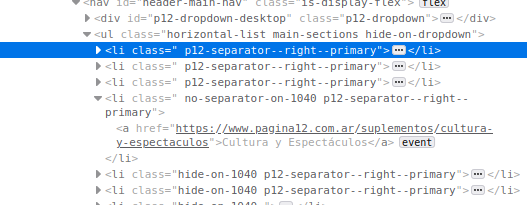

In [ ]:
# Usar esto nos buscara en s 'ul'. Sin embargo, esto devuelve el primer resultado
s.find('ul')

<ul class="horizontal-list main-supplements"><li><span class="today">Hoy:</span></li><li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/suplementos/especiales">Especiales de P12</a></li><li class=""><a href="https://www.pagina12.com.ar/suplementos/no">NO</a></li></ul>

In [ ]:
# Podemos especificar aun mas. Si nos fijamos, ul tiene una clase en especifico
# Para eso pasamos un diccionario que contenga el atributo y el valor que esperamos obtener del atributo
s.find('ul',attrs={'horizontal-list main-sections hide-on-dropdown'})

<ul class="horizontal-list main-sections hide-on-dropdown"><li class=" p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li><li class=" p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li><li class=" p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li><li class=" no-separator-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Cultura y Espectáculos</a></li><li class="hide-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li><li class="hide-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li><li class="hide-on-1040 "><a href="https://www.pagina12.com.ar/secciones/contratapa">Contratapa</a></li></ul>

Aqui ya tenemos la informacion de nuestro ul especifico donde cada li contiene en enlace y el texto de nuestras categorias
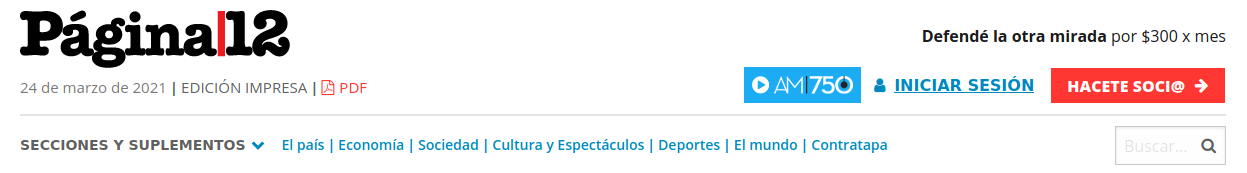

In [ ]:
# Si queremos obtener todos los nombres de las secciones podemos buscar sobre este objeto que creamos
# Esta informacion esta dentro de los li. Si queremos obtener todos los li podemos usar find_all
# que nos devuelve una lista
s.find('ul',attrs={'horizontal-list main-sections hide-on-dropdown'}).find_all('li')

[<li class=" p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>,
 <li class=" p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li>,
 <li class=" p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li>,
 <li class=" no-separator-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Cultura y Espectáculos</a></li>,
 <li class="hide-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li>,
 <li class="hide-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li>,
 <li class="hide-on-1040 "><a href="https://www.pagina12.com.ar/secciones/contratapa">Contratapa</a></li>]

In [ ]:
# Podemos ir trabajando en un elemento y luego aplicamos a todos.
secciones = s.find('ul',attrs={'horizontal-list main-sections hide-on-dropdown'}).find_all('li')
seccion = secciones[0]
seccion

<li class=" p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>

In [ ]:
# Podemos acceder al target hijo 'a'
seccion.find('a')

<a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a>

In [ ]:
# Analogamnete podemos hacer seccion.a ; esto es asumiendo que a es un hijo inmediato
seccion.a

<a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a>

In [ ]:
# De esto lo importante para nosotros es el titulo y el link. Podemos solicitarle un atributo a nuestro target
# Vemos que a tiene un ATRIBUTO que es href, pero tambien tiene un TEXTO que es el nombre de la categoria. 
# Nosotros podemos quedarnos tanto con el atributo como el texto
seccion.a.get('href')

'https://www.pagina12.com.ar/secciones/el-pais'

In [ ]:
seccion.a.get_text()

'El país'

In [ ]:
# Ya teniendo esto, sabemso como podemos obtener la informacion en nuestra lista de secciones
links_secciones = [seccion.a.get('href') for seccion in secciones]
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/contratapa']

In [ ]:
# Ahora podriamos aplicar el mismo principio para obtener los elementos de cada una de las secciones.
sec = requests.get(links_secciones[0])
sec.status_code

200

In [ ]:
s_seccion = BeautifulSoup(sec.text,'lxml')
print(s_seccion.prettify())

<!DOCTYPE html>
<html amp="" lang="es">
 <head>
  <meta charset="utf-8"/>
  <title>
   El país | Página12
  </title>
  <!-- DUST PATH: /usr/src/app/src/widgets/fc_jsonLD.dust/ -->
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}
  </script>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "NewsArticle","mainEntityOfPage": {"@type": "WebPage","@id": "https://www.pagina12.com.ar/secciones/el-pais"},"headline": "El país | Página12","isAccessibleForFree": false,"image": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo

In [ ]:
# Aqui ya obtuvimos otra pagina web, distinta a la de antes, que corresponde a haber hecho click al primer enlace
# Ahora podriamos automatizar recorrer una pagina principal, visitar los enlaces de las categorias y guardar la informacion
# de esos enlaces.
# Si a nosotros nos interesa obtener la informacion contenida en las notas podemos continuar ubicando como encontrar los elementos.

# Recordemos que find nos devuelve el primer resultado
featured_article = s_seccion.find('div',attrs={'class':'article-item__content'})
featured_article

<div class="article-item__content"><!-- Title --><h2 class="title-list"><a href="https://www.pagina12.com.ar/331594-el-nunca-mas-no-es-un-valor-aceptado-en-la-derecha">El Nunca Más no es un valor aceptado en la derecha</a></h2><!-- Kicker --><p><a href="https://www.pagina12.com.ar/331594-el-nunca-mas-no-es-un-valor-aceptado-en-la-derecha">Repudios en las redes ante las publicaciones de Patricia Bullrich y Juan José Gómez Centurión</a></p></div>

Vemos que nos está trayendo la informacion de la primera noticia
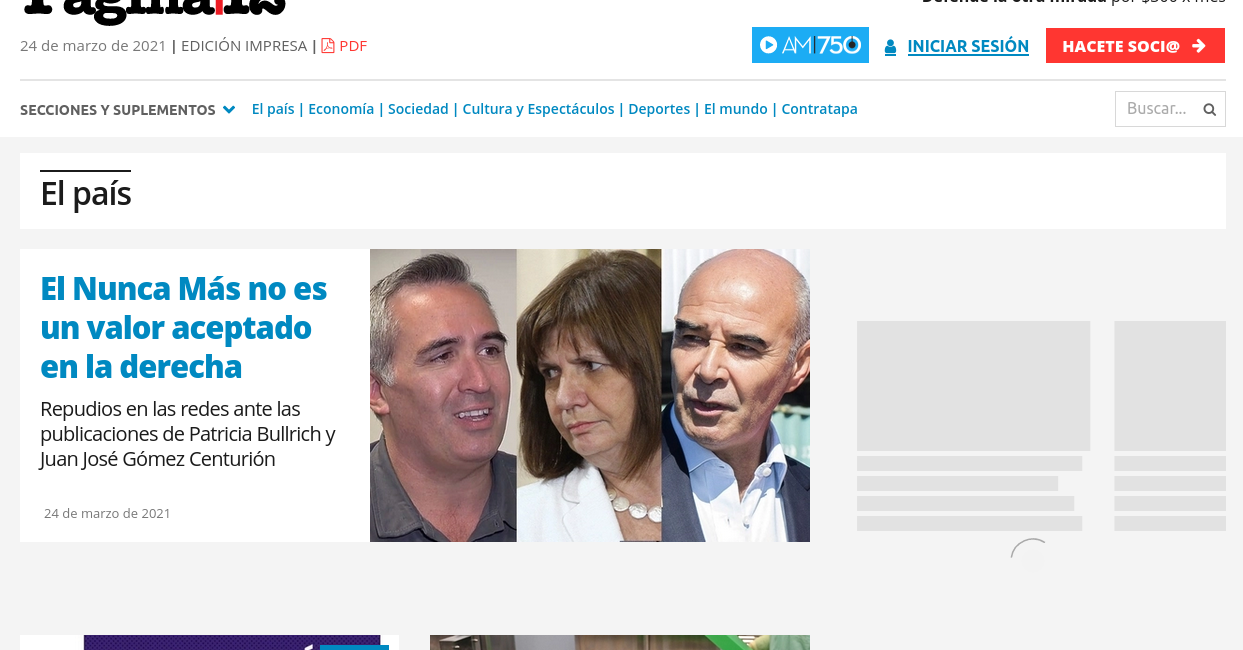

In [ ]:
# Ahora de este articulo nos interesa el link
#Con esto tenemos el enlace que nos lleva al articulo
featured_article.a.get('href')

'https://www.pagina12.com.ar/331594-el-nunca-mas-no-es-un-valor-aceptado-en-la-derecha'

In [ ]:
# Podemos hacer esto en una funcion.
import requests
from bs4 import BeautifulSoup

def obtener_notas(soup):
  '''
  Funcion que recibe un objeto de BeautifulSoup de una página de una sección y 
  devuelve una lista de URLs a las notas de esa sección
  '''
  lista_notas=[]

  # Obtener el listado de articulos
  article_list = soup.find_all('div',attrs={'class':'article-item__content'})
  for article in article_list
    lista_notas.append(article.a.get('href'))
  return lista_notas
  # Obtener el articulo p

In [ ]:
url = 'https://www.pagina12.com.ar/secciones/el-pais'
seccion = requests.get(url)
s_seccion = BeautifulSoup(seccion.text,'lxml')
obtener_notas(s_seccion)

['https://www.pagina12.com.ar/331679-el-gobierno-porteno-desmantelo-un-homenaje-a-los-desaparecid',
 'https://www.pagina12.com.ar/331656-plantar-vida-donde-se-sembro-toda-la-muerte',
 'https://www.pagina12.com.ar/331677-marziotta-es-muy-valioso-que-desde-el-deporte-tambien-se-rin',
 'https://www.pagina12.com.ar/331674-diputados-se-prepara-para-modificar-el-impuesto-a-las-gananc',
 'https://www.pagina12.com.ar/331660-el-homenaje-del-gobierno-nacional-a-las-madres-y-abuelas-de-',
 'https://www.pagina12.com.ar/331659-el-documento-de-los-organismos-esta-vez-fue-virtual',
 'https://www.pagina12.com.ar/331654-hebe-de-bonafini-nuestros-hijos-e-hijas-nos-siguen-marcando-',
 'https://www.pagina12.com.ar/331641-no-olvidamos-no-perdonamos-no-nos-reconciliamos',
 'https://www.pagina12.com.ar/331636-el-equipo-de-antropologia-forense-recordo-que-tiene-en-resgu',
 'https://www.pagina12.com.ar/331619-juntos-por-el-cambio-y-el-24-de-marzo-macri-lo-ignoro-carrio',
 'https://www.pagina12.com.ar/331594-el

## Manejo de Errores
Si por casualidad dejamos ejecutando un script y este se encuentra con un error, va a detener el proceso y habremos perdido la ejecución del programa. Una buena práctica es manejar los errores. En este caso, por ejemplo, ya que estamos utilizando request podriamos tomar el status code de que fue un request exitoso para proceder a hacer el scraping. De no ser así, que nos informe del error

In [ ]:
if r.status_code == 200:
  # Procesamos la respuesta
else:
  # informamos el error

In [ ]:
# Sin embargo, si tenemos una url mala, que puede ser que esté mal escrita y no exista o que simplemente el servidor
# esté caido en ese momento, no nos podra devolver un status code. Que te devuelvan un status code distinto a 200
# implica que un servidor recibio la peticion y envio una respuesta.

url_mala = url.replace('2','3')
requests.get(url_mala)

ConnectionError: ignored

In [ ]:
# Esto puede interrumpir la ejecucion de un codigo mas largo. Que podemos hacer?
# podemos encapsularlo en un bloque try/except
# Esto es, Intenta ejecutar este codigo, si hay algun problema ejecuta este otro codigo

try:
  requests.get(url_mala)
except:
  print('error')

error


In [ ]:
# Esto es importante hacerlo cuando estamos haciendo un scraper. Porque, por ejemplo
# si estamos scrapenado una pagina con muchas url puede ser que nos perdamos del scrapeo
# por una url mala. Entonces con esto podemos continaur con neustro programa
# incluso podemos escribir que tipo de excepcion fue

try:
  requests.get(url_mala)
except Exception as e:
  print('error en la request')
  print(e)
  print('\n')

error en la request
HTTPSConnectionPool(host='www.pagina13.com.ar', port=443): Max retries exceeded with url: /secciones/el-pais (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f5ca5274e90>: Failed to establish a new connection: [Errno -2] Name or service not known'))




In [ ]:
# Tambien podriamos usar esto para encerrar partes de nuestro codigo.
# Por ejemplo, suponiendo que queremos encontrar el tag en nuestro scraping
# pero por algna razon no existe o hay problemas

# por ejemplo:
try:
  featured_article.b.get('href')
except:
  pass # Es una mala practica dejar los except con pass. Lo recomendable es informar el error de alguna forma
print('Continua el codigo')

Continua el codigo


## Descargando el contenido de cada nota

In [ ]:
# Vamos a quedarnos con una de las url de nuestras secciones
url_nota=obtener_notas(s_seccion)[0]
# En estas notas tendremos distintos elementos. Un titulo, autor, imagenes, el contenido de la nota, etc.

In [ ]:
# Encapsulemos nuestro codigo en un Try/except

try:
  nota = requests.get(url_nota)
  if nota.status_code == 200:
    s_nota = BeautifulSoup(nota.text,'lxml')

    # Extraemos el titulo
    titulo = s_nota.find('h1',attrs={'class':'article-title'})
    print(titulo.text)

    # Extraemos la fecha del articulo
    fecha = s_nota.find('span', attrs={'pubdate':'pubdate'}).get('datetime')
    print(fecha)

    # Extraemos la volanta
    copete = s_nota.find('h2',attrs={'class':'article-prefix'})
    print(copete.text)
    
    # Extraemos el autor
    try:
      autor=''
      autor = s_nota.find('div',attrs={'class':'article-author'})
      print(autor.text)
    except:
      print('No se especifica autor')

    # Extraemos resumen
    try:
      resumen = s_nota.find('div',attrs={'class':'article-summary'})
      print(resumen.text)
    except:
      print('No hay resumen')


    # Extraemos el cuerpo
    cuerpo = s_nota.find('div',attrs={'class':'article-text'}).get_text()
    #contenido = ''
    #for parrafo in cuerpo:
    #  contenido += parrafo.text
    print(cuerpo)
    

except Exception as e:
  print('Error: ')
  print(e)
  print('\n')

El gobierno porteño desmanteló un homenaje a los desaparecidos en La Boca
2021-03-25
La Ciudad retiró los pañuelos blancos colgados de las rejas del parque Irala
Por Florencia Mó
No hay resumen
Un grupo de vecinos de La Boca instaló el martes por la noche cientos de pañuelos blancos con las leyendas “30.000 desaparecidos presentes” y “45 años de lucha” en las rejas del Parque Irala, carca de la cancha de Boca. Por la mañana, para su sorpresa, descubrieron que un trabajador de limpieza del gobierno porteño los estaba sacando y tirando en bolsas negras. Ante el pedido de explicaciones escucharon la invocación a una orden superior y lograron disuadirlo de continuar con esa tarea, aunque para entonces estiman que sólo quedaban un 30 por ciento de los pañuelos originales.En mayo de 2018 hubo un antecedente similar: las organizaciones nucleadas en la Marcha de Antorchas denunciaron entonces que por orden de las autoridades de la Comuna 4 del gobierno porteño habían sido tapados con pintura c

In [ ]:
url_nota

'https://www.pagina12.com.ar/331679-el-gobierno-porteno-desmantelo-un-homenaje-a-los-desaparecid'

Para ubicar la fecha tuvimos que buscar un elemento span, con el atributo pubdate = pubdate para ubicarnos en el elemento. Una vez ahí, vemos que la fecha que nos interesa es el valor de un atributo. Por eso usamos get 
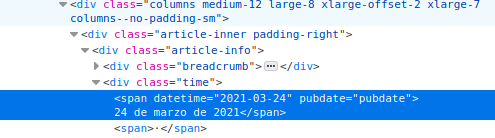

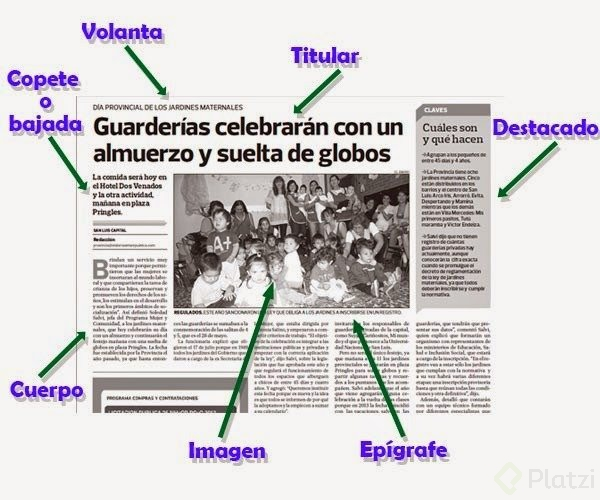

## Manejo de archivos multimedia

Las imagenes pueden funcionar de distintas maneras. Por ejemplo en nuestro caso, hay imagenes que se muestran segun el tamaño del navegador. Por ejemplo hay imagenes que aparecen solo para small y otras para xmall o medium. Es el mismo principio, buscar como se encuentra la imagen en la pagina y consultarla
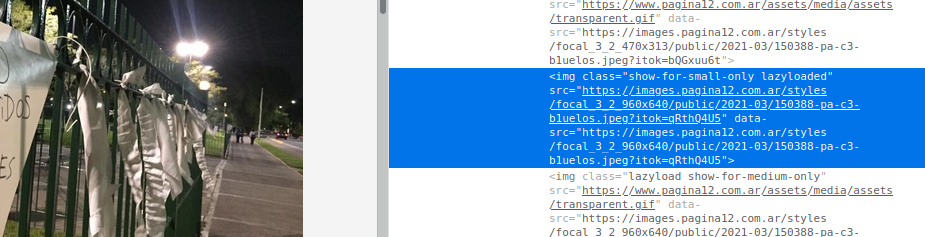

In [1]:
import requests
from bs4 import BeautifulSoup
url_nota = 'https://www.pagina12.com.ar/331679-el-gobierno-porteno-desmantelo-un-homenaje-a-los-desaparecid'
try:
  nota = requests.get(url_nota)
  if nota.status_code == 200:
    s_nota = BeautifulSoup(nota.text,'lxml')
except Exception as e:
  print('Error: ')
  print(e)
  print('\n')


In [2]:
media = s_nota.find('div',attrs={'class':'article-main-media-image'})
media
# Aqui vemos que la imagenes estan ordenadas por tamaños. Lo que decidiremos es que 
# si las encuentra, que se quede con la mas grande. 
# La imagen se va mostrando de distintos tamaños dependiendo del tamaño del navegador

<div class="article-main-media-image"><div class="article-main-media-image__container object-fit-block--contain intrinsic-container intrinsic-container-3x2"><img class="lazyload show-for-xsmall-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2021-03/150388-pa-c3-b1uelos.jpeg?itok=bQGxuu6t" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/><img class="lazyload show-for-small-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2021-03/150388-pa-c3-b1uelos.jpeg?itok=qRthQ4U5" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/><img class="lazyload show-for-medium-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2021-03/150388-pa-c3-b1uelos.jpeg?itok=qRthQ4U5" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/><img class="lazyload show-for-large-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2021-03/150388-pa-c3-

In [3]:
# Guardamos solamente las imagenes. Y vemos que se nos muestra por orden de tamaño
imagenes = media.find_all('img')
imagenes

[<img class="lazyload show-for-xsmall-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2021-03/150388-pa-c3-b1uelos.jpeg?itok=bQGxuu6t" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-small-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2021-03/150388-pa-c3-b1uelos.jpeg?itok=qRthQ4U5" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-medium-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2021-03/150388-pa-c3-b1uelos.jpeg?itok=qRthQ4U5" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-large-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2021-03/150388-pa-c3-b1uelos.jpeg?itok=qRthQ4U5" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-xlarge" data-sr

In [4]:
if len(imagenes) == 0:
  print('No se encontraron imagenes')
else:
  imagen = imagenes[-1]
  img_src = imagen.get('data-src')
  print(img_src)

https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2021-03/150388-pa-c3-b1uelos.jpeg?itok=qRthQ4U5


In [5]:
# Ahora con esto tenemos la imagen. Podriamos hacer un request ahora a esa imagen
img_req = requests.get(img_src)
img_req.status_code

200

In [6]:
# Ya sabemos que nuestro contenido no es un texto. Hasta ahora en este paso
# recibiamos un html en texto que era nuestra pagina.
# Si lo intentamos imprimir como texto, vemos algo que no tiene sentido. Son los pixeles de la imagen
img_req.content

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xc2\x00\x11\x08\x02\x80\x03\xc0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x00\x06\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x05\x06\x07\x08\t\x01\x02\x03\n\x00\x0b\xff\xda\x00\x08\x01\x01\x00\x00\x00\x00\xf0\xa3\x9ex\xd7\x7f\xbaq3\xfb;\x88!\x13\xf7.\xf8\xd7M9q\xe1\xbe\x9c~\xb6\xd7\xde\xb9"\xae\x85\'\xc5{\x95q8XrI\x95H\xb9\xc2\xce\xc0\xe2Lm\x8f\xbe\xde\xc

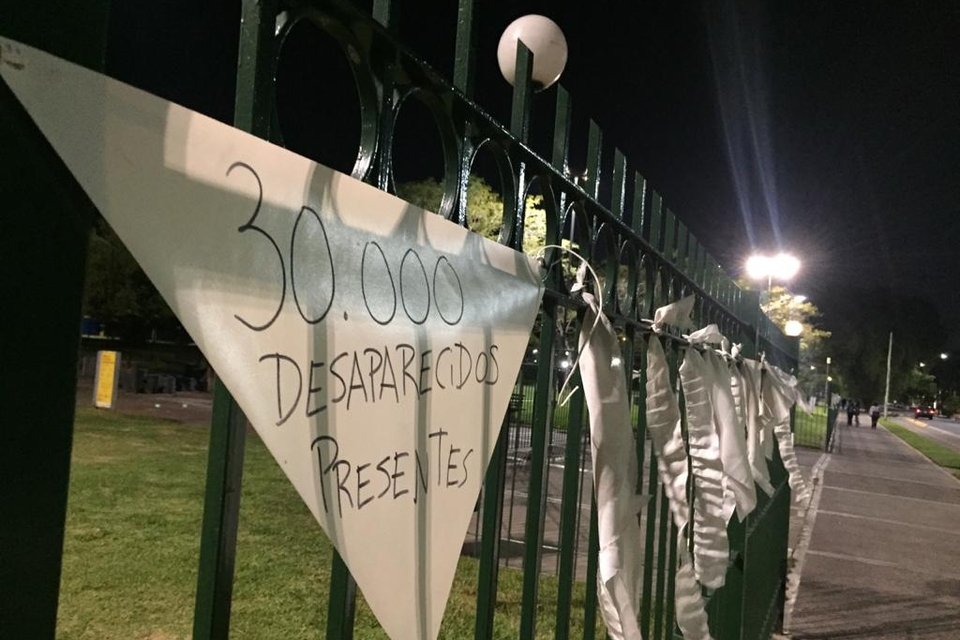

In [7]:
# Pero podemos importar una libreria para visualizar esto 

from IPython.display import Image
Image(img_req.content)

Ya con todo esto podemos unificar nuestro codigo para generar un scraper a pagina 12. Hare esto en otra libreta